In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

importing all the libraris we will be using

In [3]:
bill_df = pd.read_csv('./all_billionaires_1997_2023.csv')
bill_df.head()

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,1997,7,NaN,2.0 B,Sophonpanich,Chatri,Chatri Sophonpanich & family,1934-02-28,73.0,Male,Thailand,Thailand,Bangkok,Finance and Investments,['Finance and Investments'],NaN,NaN,False,NaN
1,1997,7,NaN,1.8 B,Adulyadej,King Bhumibol,King Bhumibol Adulyadej,1927-12-05,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1998,7,NaN,3.3 B,Safra,Edmond,Edmond Safra,1932-08-06,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,NaN,True,NaN
3,1999,7,NaN,1.0 B,Hinduja,"Srichand, Gopichand,",Srichand & Gopichand Hinduja,1935-11-28,NaN,NaN,India,United Kingdom,London,NaN,NaN,NaN,NaN,False,NaN
4,1999,7,NaN,7.1 B,Schwarz,Dieter,Dieter Schwarz,1939-09-24,59.0,Male,Germany,Germany,Neckarsulm,Fashion & Retail,['Fashion & Retail'],NaN,NaN,True,NaN


Importing the data set and reading the head(first 5 columns) to make sure the data has been imported correctly

In [4]:
bill_df['net_worth'] = bill_df['net_worth'].str.replace('B','').str.strip().astype(float)
bill_df['birth_date'] = pd.to_datetime(bill_df['birth_date'])
bill_df['birth_date_month'] = bill_df['birth_date'].dt.month
bill_df['birth_date_year'] = bill_df['birth_date'].dt.year
bill_df['birth_date_month_name'] = bill_df['birth_date'].dt.strftime('%B')
bill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31732 entries, 0 to 31731
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   year                      31732 non-null  int64         
 1   month                     31732 non-null  int64         
 2   rank                      31714 non-null  float64       
 3   net_worth                 31732 non-null  float64       
 4   last_name                 28043 non-null  object        
 5   first_name                27985 non-null  object        
 6   full_name                 31732 non-null  object        
 7   birth_date                27328 non-null  datetime64[ns]
 8   age                       31057 non-null  float64       
 9   gender                    27903 non-null  object        
 10  country_of_citizenship    31723 non-null  object        
 11  country_of_residence      31030 non-null  object        
 12  city_of_residence 

Cleaning and optimizing the data so that we can utilise it better

c:\Users\Ibtisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


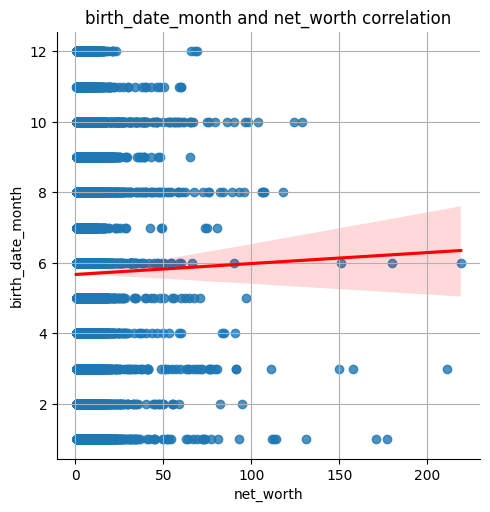

In [5]:
sns.lmplot(data = bill_df, x='net_worth', y='birth_date_month', line_kws={'color': 'red'})
plt.grid(True)
plt.title('birth_date_month and net_worth correlation')
plt.show()

We can see no correlation between the month born and the networth

c:\Users\Ibtisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


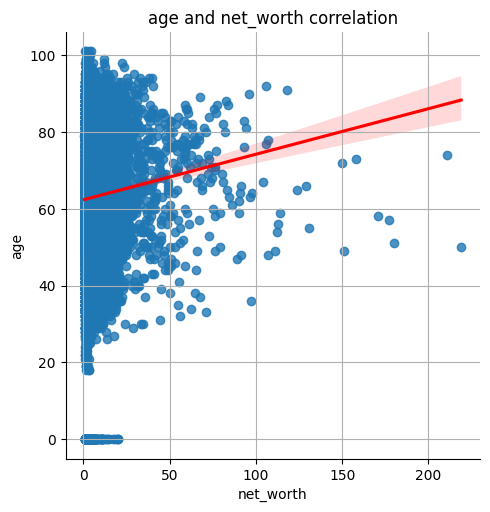

In [6]:
sns.lmplot(data = bill_df, x='net_worth', y='age', line_kws={'color': 'red'})
plt.grid(True)
plt.title('age and net_worth correlation')
plt.show()

As obvious we can see that as you grow you tend to get more richer as you have time accumalting wealth

c:\Users\Ibtisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


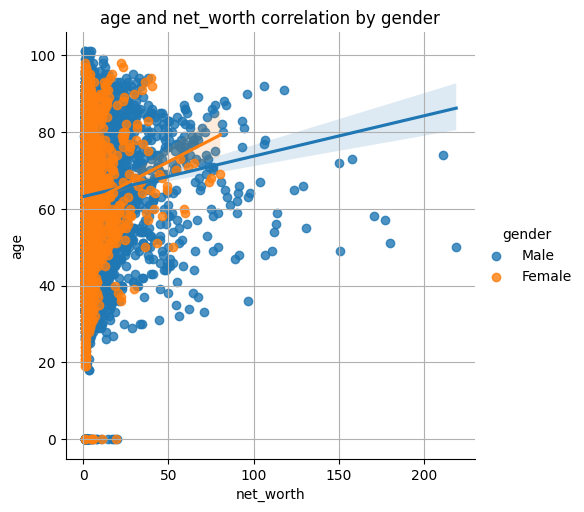

In [7]:
sns.lmplot(data = bill_df, x='net_worth', y='age', hue='gender')
plt.grid(True)
plt.title('age and net_worth correlation by gender')
plt.show()

we can see that males as they grow older gradually have a steady increase in their wealth but females also have a slow start in accumilating their wealth but have a faster increase as they grow older

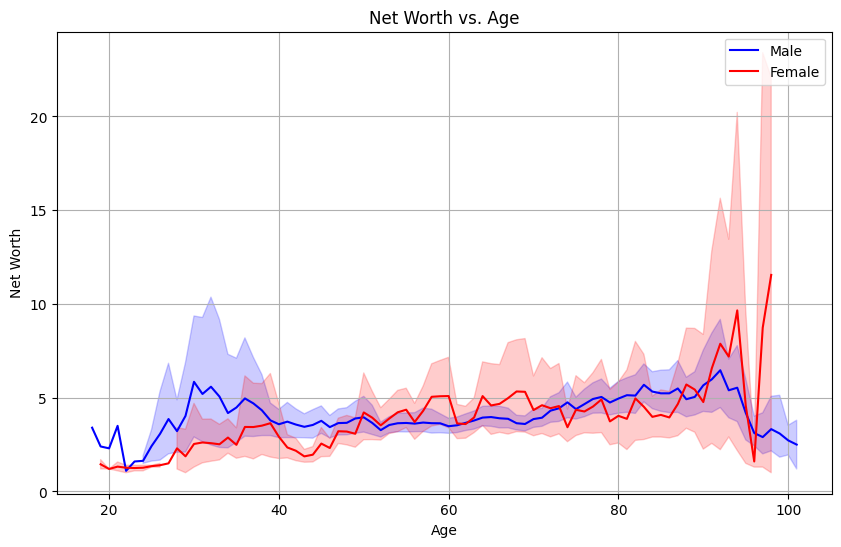

In [8]:
filtered_df = bill_df[bill_df['age'] > 0].sort_values('age', ascending=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='net_worth', hue='gender', data=filtered_df, palette={'Male': 'blue', 'Female': 'red'})

plt.title('Net Worth vs. Age')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.legend()
plt.grid(True)
plt.show()

Young men have usually a higher net worth, but with age, old women tend to get richer than old man

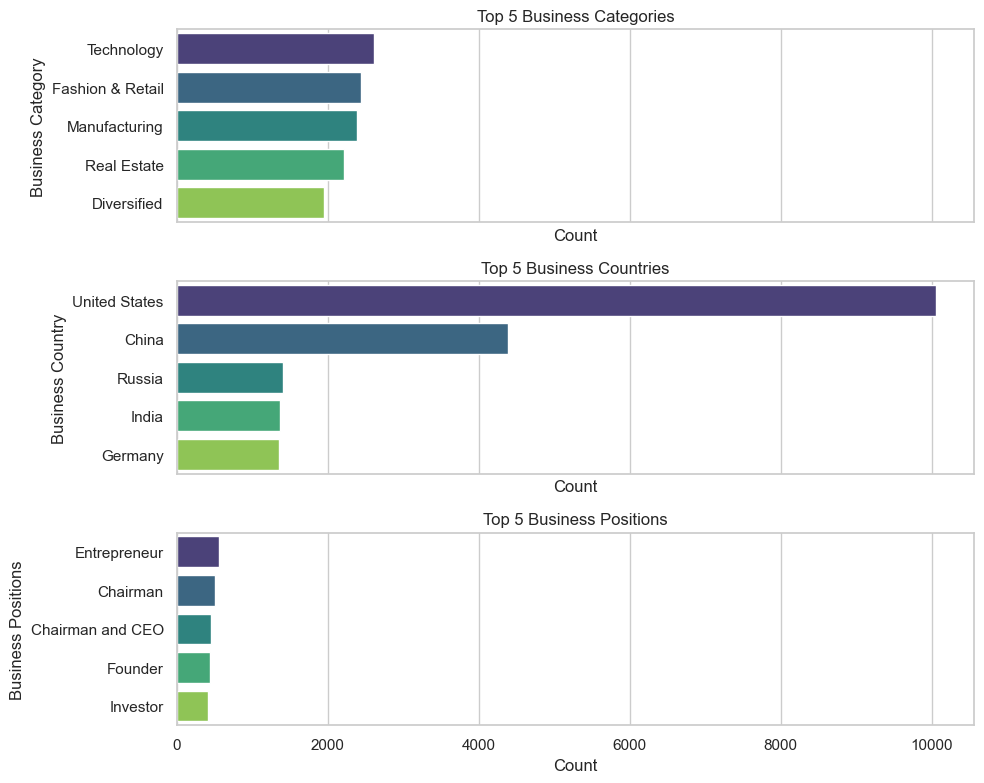

In [9]:
top_categories = bill_df['business_category'].value_counts().head(5)
top_countries = bill_df['country_of_residence'].value_counts().head(5)
top_positions = bill_df['position_in_organization'].value_counts().head(5)

sns.set(style="whitegrid")


fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)


sns.barplot(ax=axes[0], x=top_categories.values, y=top_categories.index, palette="viridis")
axes[0].set_title('Top 5 Business Categories')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Business Category')

sns.barplot(ax=axes[1], x=top_countries.values, y=top_countries.index, palette="viridis")
axes[1].set_title('Top 5 Business Countries')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Business Country')

sns.barplot(ax=axes[2], x=top_positions.values, y=top_positions.index, palette="viridis")
axes[2].set_title('Top 5 Business Positions')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Business Positions')

plt.tight_layout()

plt.show()

Here we can see a breakdown between various top 5 categories and how the wealth is divided between these top 5 categories